# Predict Regulation Throughput Ratio with CART Decision Trees
## (Raise Frequency Regulation Service)

## 1. Import the necessary modules and libraries

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import pydotplus

# machine learning
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn import tree

## 2. Exploring and Preprocessing the Data

In [2]:
# read data from csv file
df = pd.read_csv("df_raise_alldata.csv").fillna(0)

In [3]:
df = df.drop(['Unnamed: 0'],axis=1)
df.head(5)

,Interval Ending (AEST),BLUFF1,CLEMGPWF,HALLWF1,HALLWF2,HDWF1,HDWF2,HDWF3,LKBONNY2,LKBONNY3,...,SNOWNTH1,SNOWSTH1,SNOWTWN1,WATERLWF,Unnamed: 15,Average Frequency (Hz),Median Frequency (Hz),Cummulative Frequency (Hz),Difference Frequency (Hz),Raise Throughput Ratio
0,1/1/18 0:10,11.9,3.24158,13.01,10.33,22.2,13.9,17.9,42.13140,10.27125,...,14.9,8.6,13.64382,11.9,0.0,50.056733,50.060001,2.159977,0.020000,0.224593
1,1/1/18 0:40,13.0,5.83484,6.14,8.14,21.2,15.7,15.8,38.24060,12.67160,...,9.3,3.4,7.75261,14.2,0.0,49.992867,49.980000,2.089989,0.150002,0.689341
2,1/1/18 0:45,13.7,6.12298,6.53,7.22,21.7,15.6,15.5,28.10419,9.54556,...,8.0,1.7,7.56961,12.5,0.0,50.010567,50.000000,2.019958,-0.080002,0.266614
3,1/1/18 0:50,12.6,6.62722,6.68,6.67,22.9,16.8,15.2,29.15364,8.42912,...,8.6,1.6,6.49690,11.4,0.0,50.017000,50.009998,1.929985,0.029999,0.703356
4,1/1/18 0:55,11.0,4.82635,7.59,7.14,21.1,16.9,14.5,27.82511,8.81988,...,8.4,1.1,5.87731,10.1,0.0,50.042333,50.049999,2.070015,0.070000,0.003143


In [4]:
column_names=list(df)
column_names

['Interval Ending (AEST)',
 'BLUFF1',
 'CLEMGPWF',
 'HALLWF1',
 'HALLWF2',
 'HDWF1',
 'HDWF2',
 'HDWF3',
 'LKBONNY2',
 'LKBONNY3',
 'NBHWF1',
 'SNOWNTH1',
 'SNOWSTH1',
 'SNOWTWN1',
 'WATERLWF',
 'Unnamed: 15',
 'Average Frequency (Hz)',
 'Median Frequency (Hz)',
 'Cummulative Frequency (Hz)',
 'Difference Frequency (Hz)',
 'Raise Throughput Ratio']

In [5]:
#from sklearn import preprocessing
#scaler = preprocessing.StandardScaler()
#df_array = scaler.fit_transform(df)
#df = pd.DataFrame(df_array)
#df.columns=column_names
#df.head(5)

In [6]:
df.describe()

,BLUFF1,CLEMGPWF,HALLWF1,HALLWF2,HDWF1,HDWF2,HDWF3,LKBONNY2,LKBONNY3,NBHWF1,SNOWNTH1,SNOWSTH1,SNOWTWN1,WATERLWF,Unnamed: 15,Average Frequency (Hz),Median Frequency (Hz),Cummulative Frequency (Hz),Difference Frequency (Hz),Raise Throughput Ratio
count,20535.000000,20535.000000,20535.000000,20535.000000,20535.000000,20535.000000,20535.000000,20535.000000,20535.000000,20535.000000,20535.000000,20535.000000,20535.000000,20535.000000,20535.000000,20535.000000,20535.000000,20535.000000,20535.000000,20535.000000
mean,19.813264,21.624513,38.767415,29.861424,42.368068,39.863514,43.293565,49.959412,12.397599,53.183611,55.628494,52.804282,40.826846,48.532683,0.641488,50.006977,50.005772,2.373395,0.002109,0.396186
std,17.331952,17.932268,29.812225,22.913906,31.753946,31.344071,33.280824,46.305012,11.646820,41.942099,45.441511,40.191390,32.711374,40.429930,2.440933,0.042489,0.045957,0.233683,0.084491,0.274535
min,-0.200000,-0.648320,-0.870000,-0.570000,-1.100000,-1.200000,-1.300000,-1.433660,-0.336680,-1.300000,0.000000,0.000000,-0.905580,-1.200000,0.000000,49.707900,49.689999,1.589897,-0.310001,0.000001
25%,2.700000,3.997000,9.950000,7.560000,12.100000,10.707500,12.100000,10.002665,2.456170,12.100000,12.200000,13.900000,7.362140,12.200000,0.000000,49.982000,49.980000,2.219978,-0.050003,0.163533
50%,15.616000,18.801140,35.050000,27.868000,38.300000,34.000000,38.000000,34.489880,8.150010,47.700000,45.400000,46.580000,37.723530,37.088000,0.000000,50.008767,50.000000,2.360020,0.000000,0.352865
75%,37.251405,39.314875,68.302685,51.550000,72.414115,70.000000,75.270565,89.305680,22.370000,93.560735,100.900000,90.315795,71.989620,88.200000,0.000000,50.034433,50.029999,2.519955,0.060001,0.600152
max,52.876000,56.507000,90.770000,70.257000,100.700000,102.500000,110.100000,157.954000,38.854000,131.241000,143.600010,125.076000,96.641570,129.964000,19.300000,50.153433,50.160000,4.219955,0.360001,0.999971


##  3. Split `df` into `df_train`, `df_test` with 30% as test

In [7]:
# If split randomly:
df_train, df_test = train_test_split(df, test_size = 0.3, random_state = 80)
# If split according to the datetime sequence:
#cut_point = round(len(df)*0.7)
#df_train = df[:cut_point]
#time_train = time[:cut_point]
#df_test = df[cut_point:]
#time_test = time[cut_point:]

display(df_train.head())
display(df_test.head())

,Interval Ending (AEST),BLUFF1,CLEMGPWF,HALLWF1,HALLWF2,HDWF1,HDWF2,HDWF3,LKBONNY2,LKBONNY3,...,SNOWNTH1,SNOWSTH1,SNOWTWN1,WATERLWF,Unnamed: 15,Average Frequency (Hz),Median Frequency (Hz),Cummulative Frequency (Hz),Difference Frequency (Hz),Raise Throughput Ratio
2590,2/6/18 22:25,19.300,51.72114,10.600,14.070,47.10,53.100,60.700,29.19302,4.52158,...,61.700,65.000,58.32580,12.900,0.0,49.969167,49.950001,2.590000,0.130001,0.598873
6828,4/3/18 13:30,0.000,-0.43221,-0.460,-0.350,-0.70,-0.700,-0.800,6.41352,1.22808,...,4.700,12.500,3.29705,-0.100,0.0,50.003734,50.000000,2.520100,0.020000,0.293776
13082,7/2/18 19:15,18.700,15.12735,10.120,12.960,25.50,19.900,21.400,91.45809,22.88703,...,43.000,29.700,37.34108,18.400,0.0,50.013200,50.009998,2.330002,0.070000,0.201445
1166,1/13/18 6:05,29.629,48.84500,73.248,49.485,82.02,61.563,68.948,39.03800,12.92400,...,114.303,111.271,88.29600,110.267,0.0,49.960400,49.970001,2.520077,-0.020000,0.374969
7995,4/19/18 22:45,10.600,19.59352,36.530,0.000,52.70,39.500,45.500,26.22881,7.87090,...,41.000,52.700,42.22399,27.400,0.0,50.002633,50.000000,2.080036,-0.020000,0.033337


,Interval Ending (AEST),BLUFF1,CLEMGPWF,HALLWF1,HALLWF2,HDWF1,HDWF2,HDWF3,LKBONNY2,LKBONNY3,...,SNOWNTH1,SNOWSTH1,SNOWTWN1,WATERLWF,Unnamed: 15,Average Frequency (Hz),Median Frequency (Hz),Cummulative Frequency (Hz),Difference Frequency (Hz),Raise Throughput Ratio
17897,9/5/18 18:00,31.3,25.21226,28.95,33.46,30.7,35.2,32.2,54.19388,14.01133,...,92.10000,69.7,0.00000,21.4,12.2,50.024333,50.020000,2.100025,-0.100002,0.706160
1541,1/20/18 15:50,2.7,20.96219,10.48,19.28,55.5,31.4,44.8,47.37855,8.59659,...,87.89999,51.8,0.00000,8.3,0.0,50.026167,50.020000,2.099987,-0.020000,0.796526
4891,3/6/18 16:40,48.6,44.08543,77.69,46.83,68.2,69.0,67.1,133.46681,32.71170,...,142.39999,102.7,88.33861,66.2,0.0,50.009867,50.000000,2.449955,-0.090000,0.192190
12331,6/18/18 18:50,0.1,-0.36018,-0.56,-0.39,7.3,4.4,6.5,2.39467,0.16747,...,6.10000,5.5,-0.27679,0.5,0.0,50.010833,50.009998,2.549995,0.110001,0.289528
939,1/10/18 18:25,0.0,-0.36018,-0.46,-0.34,-0.7,-0.6,-0.7,10.96269,2.84692,...,0.00000,0.0,-0.71448,2.1,0.0,50.001200,49.980000,3.910019,-0.150002,0.376292


In [8]:
time_train = df_train['Interval Ending (AEST)']
time_test = df_test['Interval Ending (AEST)']
df_train = df_train.drop(['Interval Ending (AEST)'],axis=1)
df_test = df_test.drop(['Interval Ending (AEST)'],axis=1)

In [9]:
# Split df_train
X_train = df_train.drop('Raise Throughput Ratio',axis=1) # Features
Y_train = df_train['Raise Throughput Ratio']

# Split df_train
X_test = df_test.drop('Raise Throughput Ratio',axis=1) # Features
Y_test = df_test['Raise Throughput Ratio']

In [10]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(14374, 19) (14374,)
(6161, 19) (6161,)


## 4. Fit Regression Model

In [11]:
param_grid = {'max_depth':np.arange(1,6),
             'min_samples_leaf':np.arange(1,3),
             'min_samples_split':np.arange(2,4)            
             }

clf = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5)
clf.fit(X_train,Y_train)

print("best_parms:{0}\nbest_score:{1}".format(clf.best_params_, clf.best_score_))

best_parms:{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
best_score:0.038305839374241035


In [12]:
max_d = clf.best_params_['max_depth']
min_sl = clf.best_params_['min_samples_leaf']
min_ss = clf.best_params_['min_samples_split']
max_d,min_sl,min_ss

(3, 1, 2)

Text(0, 0.5, 'MSE')

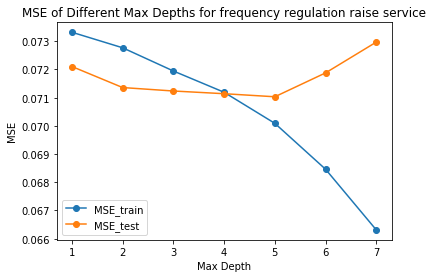

In [13]:
# Find the optimal max_depth
mse_train,mse_test = [],[]
m_d = range(1,8)
for md in m_d:
    DTR = DecisionTreeRegressor(max_depth=md,min_samples_leaf=min_sl,
                           min_samples_split=min_ss)
    DTR.fit(X_train,Y_train)
    Y_train_pred = DTR.predict(X_train)
    mse_train.append(mean_squared_error(Y_train, Y_train_pred))
    Y_test_pred = DTR.predict(X_test)
    mse_test.append(mean_squared_error(Y_test, Y_test_pred))
plt.plot(m_d,mse_train,'o-',label='MSE_train')
plt.plot(m_d,mse_test,'o-',label='MSE_test')
plt.legend()
plt.title('MSE of Different Max Depths for frequency regulation raise service')
plt.xlabel('Max Depth')
plt.ylabel('MSE')

In [14]:
# Choose the max_depth of min mse_test as the optimal max_depth
md_chosen = m_d[mse_test.index(min(mse_test))]
print('optimal max_depth =',md_chosen)

optimal max_depth = 5


In [15]:
DTR = DecisionTreeRegressor(max_depth=md_chosen,min_samples_leaf=min_sl,
                           min_samples_split=min_ss)
DTR.fit(X_train,Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

## 5. Predict

In [16]:
Y_train_pred = DTR.predict(X_train)
print('MSE_train =',mean_squared_error(Y_train, Y_train_pred))

MSE_train = 0.07009026071497435


In [17]:
Y_test_pred = DTR.predict(X_test)
print('MSE_test =',mean_squared_error(Y_test, Y_test_pred))

MSE_test = 0.07103173432669845


([], <a list of 0 Text xticklabel objects>)

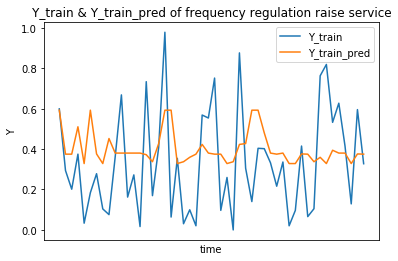

In [18]:
plt.plot(time_train[:50],Y_train[:50],label='Y_train')
plt.plot(time_train[:50],Y_train_pred[:50],label='Y_train_pred')
plt.legend()
plt.title('Y_train & Y_train_pred of frequency regulation raise service')
plt.xlabel('time')
plt.ylabel('Y')
plt.xticks([])

([], <a list of 0 Text xticklabel objects>)

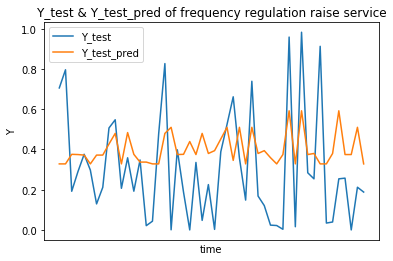

In [19]:
plt.plot(time_test[:50],Y_test[:50],label='Y_test')
plt.plot(time_test[:50],Y_test_pred[:50],label='Y_test_pred')
plt.legend()
plt.title('Y_test & Y_test_pred of frequency regulation raise service')
plt.xlabel('time')
plt.ylabel('Y')
plt.xticks([])

In [20]:
dot_data = tree.export_graphviz(DTR,out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data) 
graph.write_jpg("DecisionTree_raise.jpg")

True